In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.cluster import KMeans 

In [45]:
fd=pd.read_csv("Universities.csv")
fd

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [46]:
df = pd.read_csv('universities_std.csv')
df

,Unnamed: 0,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [47]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [48]:
cluster = np.arange(1,11)

[9.98823519663856, 4.123452442397179, 3.1129971286859073, 2.849980625046263, 2.428950979741, 1.7983213574426054, 1.6958552076572295, 1.4740060719508004, 0.9693000461948886, 0.811112971789457]


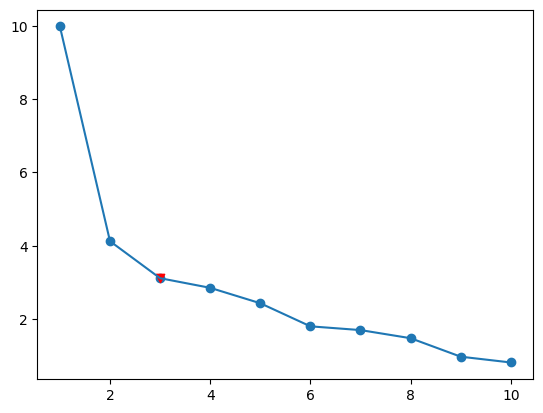

In [55]:
wss = []
for k in cluster:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(df)
    wss.append(model.inertia_)

plt.plot(cluster,wss)
plt.scatter(cluster,wss)
plt.scatter(cluster[2], wss[2],color="red", label="Optimal K", marker="v")
print(wss)
plt.show()

    

In [42]:
model = KMeans(n_clusters=3, random_state=12345)
model.fit(df)
a=model.labels_

In [43]:
a

array([1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2,
       2, 0, 1], dtype=int32)

In [35]:
ad=pd.DataFrame(a)
ad

,0
0,1
1,1
2,0
3,1
4,2
5,1
6,1
7,2
8,1
9,1


In [36]:
ad.columns=['cluster']

In [37]:
ad

,cluster
0,1
1,1
2,0
3,1
4,2
5,1
6,1
7,2
8,1
9,1


In [38]:
df2=pd.concat([df,ad],axis=1)
df2

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,1
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,1
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,0
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,1
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,2
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333,1
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333,1
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333,2
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000,1
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667,1


In [40]:
df3=pd.concat([fd,ad],axis=1)
df3

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,1
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,1
